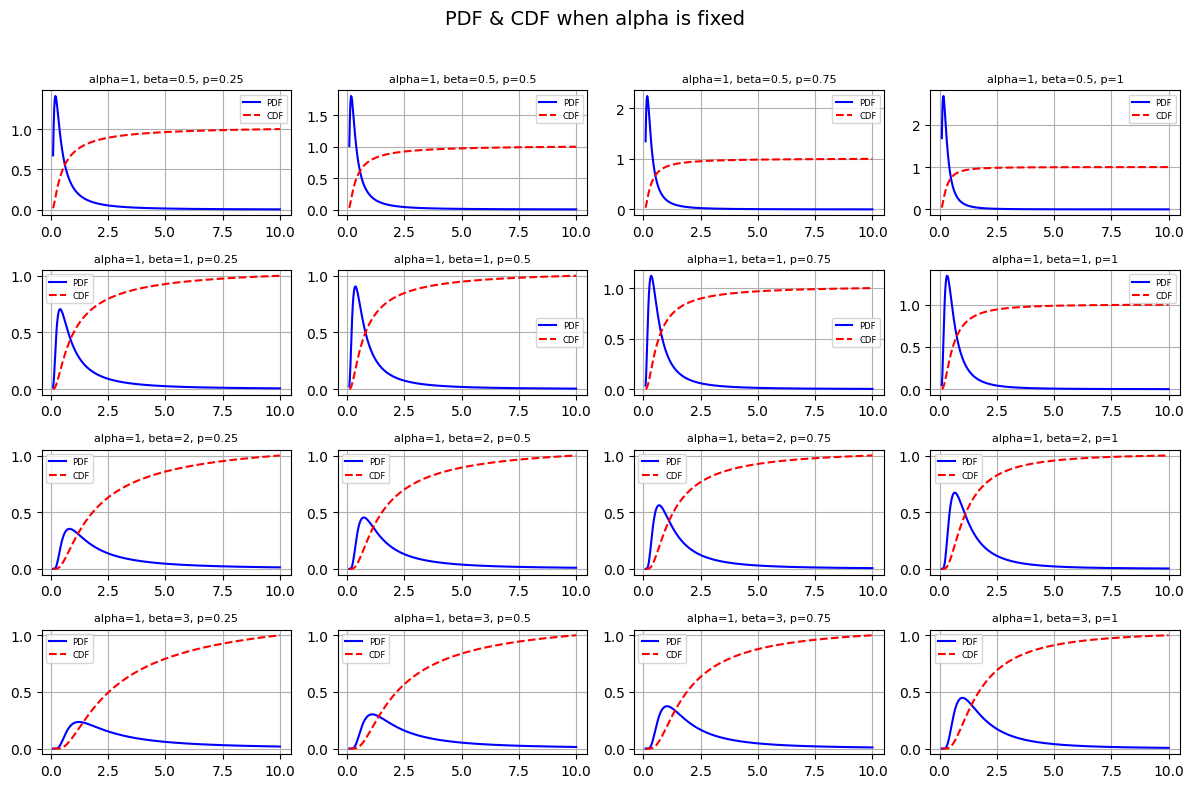

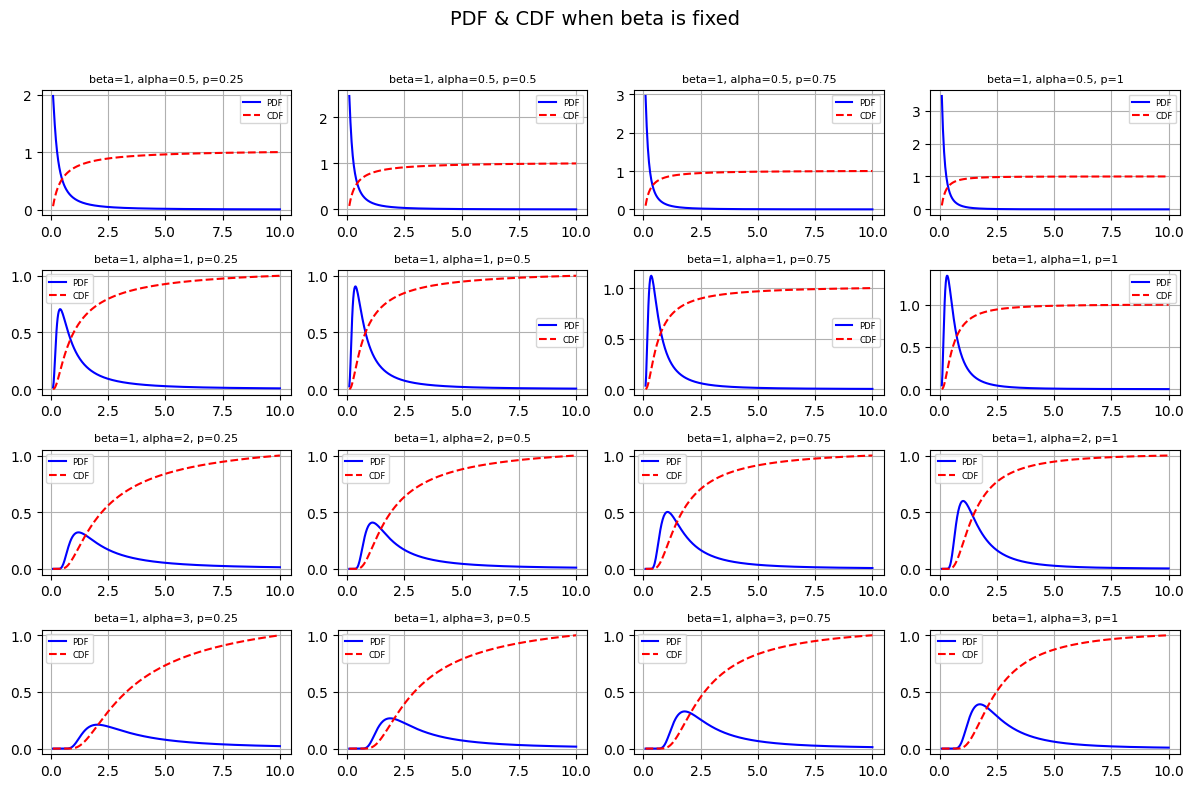

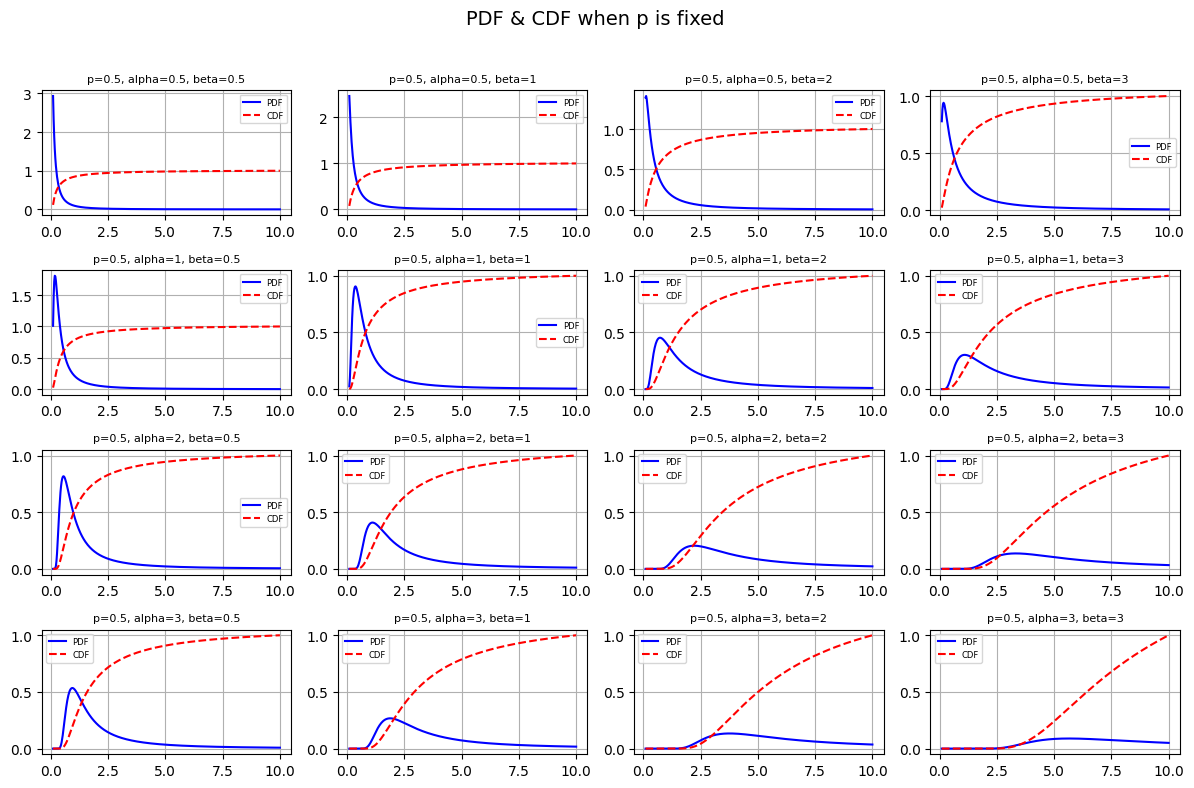

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variable
x = sp.symbols('x', positive=True)
alpha, beta, p = sp.symbols('alpha beta p', positive=True, real=True)

# PDF expression (symbolic)
f_expr = alpha*beta*x**(-2) * (1 + beta*x**(-1))**(alpha-1) \
         * sp.exp(1 - (1 + beta*x**(-1))**alpha) \
         * (1 - 2*p + p*(1 + beta*x**(-1))**alpha)

# Turn into numeric function (only PDF, no symbolic CDF)
f_num = sp.lambdify((x, alpha, beta, p), f_expr, 'numpy')

# Range for x
x_vals = np.linspace(0.1, 10, 400)
dx = x_vals[1] - x_vals[0]  # step size for numerical integration

# Parameter ranges
alpha_vals = [0.5, 1, 2, 3]
beta_vals  = [0.5, 1, 2, 3]
p_vals     = [0.25, 0.5, 0.75, 1]

# ---- Function to plot results ----
def plot_pdf_cdf(param_name, fixed_val, values1, values2):
    plt.figure(figsize=(12,8))
    plot_idx = 1

    for v1 in values1:
        for v2 in values2:
            plt.subplot(len(values1), len(values2), plot_idx)

            if param_name == "alpha":
                f_vals = f_num(x_vals, fixed_val, v1, v2)
                title = f"alpha={fixed_val}, beta={v1}, p={v2}"
            elif param_name == "beta":
                f_vals = f_num(x_vals, v1, fixed_val, v2)
                title = f"beta={fixed_val}, alpha={v1}, p={v2}"
            else:  # p fixed
                f_vals = f_num(x_vals, v1, v2, fixed_val)
                title = f"p={fixed_val}, alpha={v1}, beta={v2}"

            # Replace negative values (possible from numerical instability)
            f_vals = np.maximum(f_vals, 0)

            # Approximate CDF by cumulative sum
            F_vals = np.cumsum(f_vals) * dx
            F_vals = F_vals / F_vals[-1]  # normalize to 1

            # Plot PDF & CDF
            plt.plot(x_vals, f_vals, label="PDF", color="blue")
            plt.plot(x_vals, F_vals, label="CDF", color="red", linestyle="--")
            plt.title(title, fontsize=8)
            plt.grid(True)
            plt.legend(fontsize=6)
            plot_idx += 1

    plt.suptitle(f"PDF & CDF when {param_name} is fixed", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# ---- Run experiments ----
# Case 1: Fix alpha, vary beta & p
plot_pdf_cdf("alpha", fixed_val=1, values1=beta_vals, values2=p_vals)

# Case 2: Fix beta, vary alpha & p
plot_pdf_cdf("beta", fixed_val=1, values1=alpha_vals, values2=p_vals)

# Case 3: Fix p, vary alpha & beta
plot_pdf_cdf("p", fixed_val=0.5, values1=alpha_vals, values2=beta_vals)
